In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [66]:
url='https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv'
df=pd.read_csv('/Users/bhavyachhabra/Downloads/covid-19-master-2/data/countries-aggregated.csv')
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [67]:
df.rename(columns={'Date': 'date',
                  'Country': 'country',
                  'Confirmed': 'confirmed',
                  'Deaths':'deaths',
                  'Recovered':'recovered',},inplace=True)

In [68]:
df['active'] = df['confirmed'] - df['deaths'] - df['recovered']

In [69]:
top=df[df['date']==df['date'].max()]
world=top.groupby('country')['confirmed','active','deaths'].sum().reset_index()
world.head()

,country,confirmed,active,deaths
0,Afghanistan,8676,7545,193
1,Albania,969,167,31
2,Algeria,7728,3091,575
3,Andorra,762,72,51
4,Angola,58,38,3


In [ ]:
figure=px.choropleth(world,locations='country',
                     locationmode='country names', color='active',
                     hover_name='country',range_color=[1,1000],
                     color_continuous_scale='Peach',
                     title='countries with Active Cases')
figure.show()

[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Dates')]

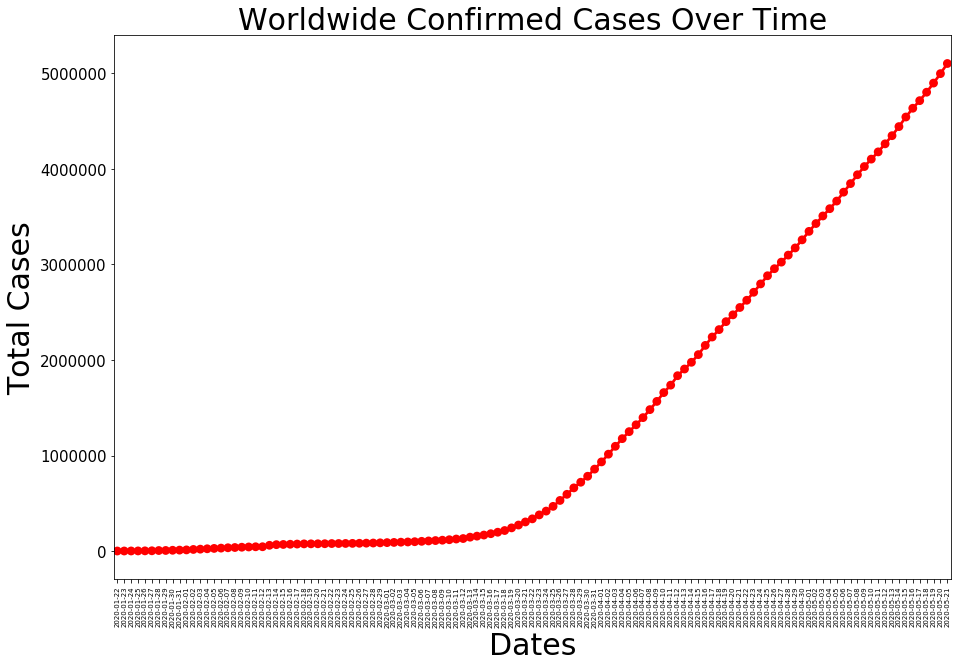

In [84]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90,fontsize=7)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel('Total cases',fontsize=30)
plt.title('Worldwide Confirmed Cases Over Time', fontsize=30)
total_cases=df.groupby('date')['date','confirmed'].sum().reset_index()
total_cases['date']=pd.to_datetime(total_cases['date'])

ax = sns.pointplot(x=total_cases.date.dt.date,y=total_cases.confirmed,color='r')
ax.set(xlabel='Dates',ylabel='Total Cases')

In [137]:
top_activities=top.groupby(by='country')['active'].sum().sort_values(ascending=False).head(20).reset_index()
top

,date,country,confirmed,recovered,deaths,active
22560,2020-05-21,Afghanistan,8676,938,193,7545
22561,2020-05-21,Albania,969,771,31,167
22562,2020-05-21,Algeria,7728,4062,575,3091
22563,2020-05-21,Andorra,762,639,51,72
22564,2020-05-21,Angola,58,17,3,38
...,...,...,...,...,...,...
22743,2020-05-21,West Bank and Gaza,423,346,2,75
22744,2020-05-21,Western Sahara,6,6,0,0
22745,2020-05-21,Yemen,197,5,33,159
22746,2020-05-21,Zambia,866,302,7,557


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

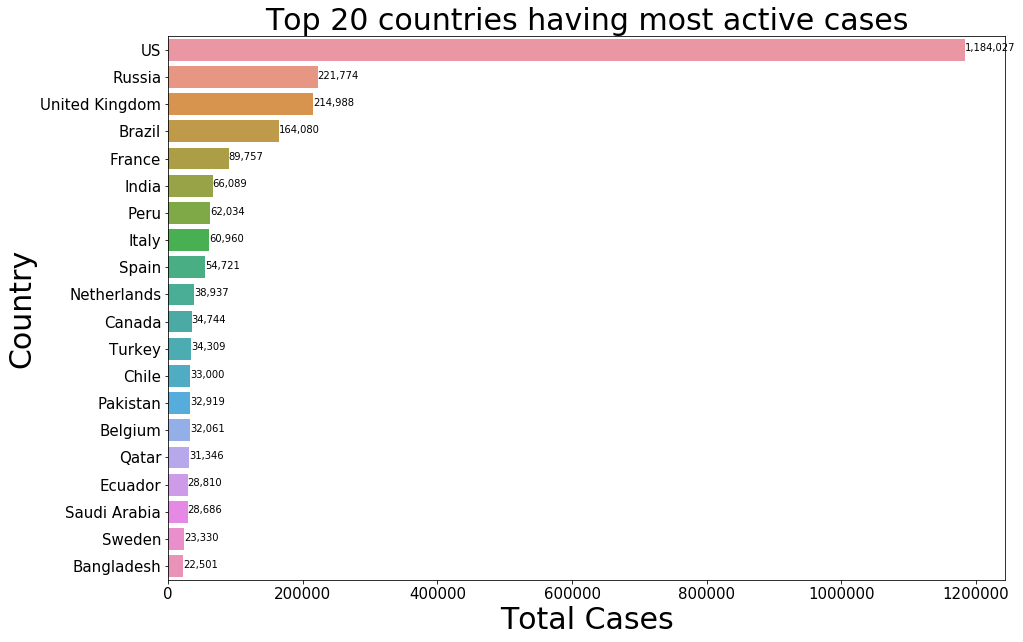

In [141]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel('Country',fontsize=30)
plt.title('Top 20 countries having most active cases', fontsize=30)
ax = sns.barplot(x=top_activities.active,y=top_activities.country)
for i, (value,name) in enumerate(zip(top_activities.active,top_activities.country)):
    ax.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
ax.set(xlabel='Total Cases',ylabel='Country')

In [92]:
top_deaths=top.groupby(by='country')['deaths'].sum().sort_values(ascending=False).head(20).reset_index()

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

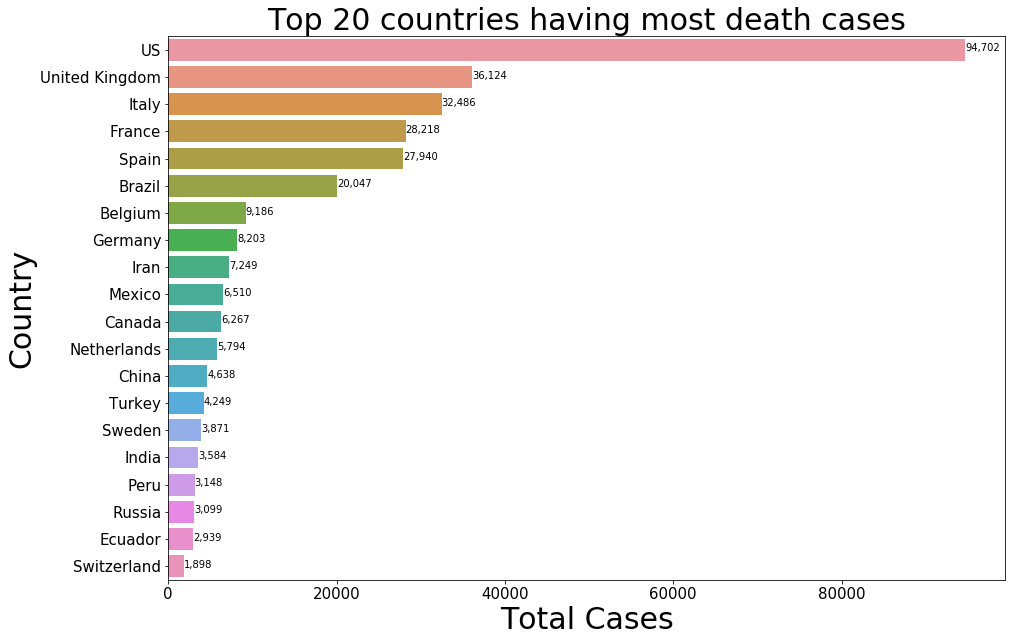

In [94]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel('Country',fontsize=30)
plt.title('Top 20 countries having most death cases', fontsize=30)
ax = sns.barplot(x=top_deaths.deaths,y=top_deaths.country)
for i, (value,name) in enumerate(zip(top_deaths.deaths,top_deaths.country)):
    ax.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
ax.set(xlabel='Total Cases',ylabel='Country')

In [100]:
top_recovered=top.groupby(by='country')['recovered'].sum().sort_values(ascending=False).head(20).reset_index()

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

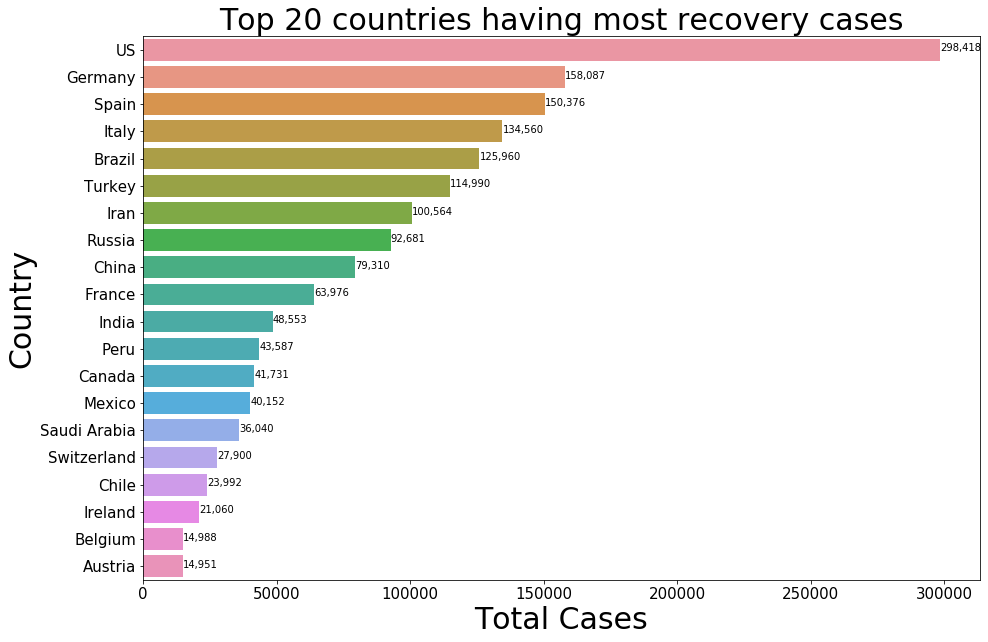

In [101]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel('Country',fontsize=30)
plt.title('Top 20 countries having most recovery cases', fontsize=30)
ax = sns.barplot(x=top_recovered.recovered,y=top_recovered.country)
for i, (value,name) in enumerate(zip(top_recovered.recovered,top_recovered.country)):
    ax.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
ax.set(xlabel='Total Cases',ylabel='Country')

In [123]:
china=df[df.country=='China']
china=china.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
china

,date,recovered,deaths,confirmed,active
0,2020-01-22,28,17,548,503
1,2020-01-23,30,18,643,595
2,2020-01-24,36,26,920,858
3,2020-01-25,39,42,1406,1325
4,2020-01-26,49,56,2075,1970
...,...,...,...,...,...
116,2020-05-17,79306,4638,84054,110
117,2020-05-18,79310,4638,84063,115
118,2020-05-19,79310,4638,84063,115
119,2020-05-20,79310,4638,84063,115


In [124]:
us=df[df.country=='US']
us=us.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
us.iloc[33:].reset_index().drop('index',axis=1)

,date,recovered,deaths,confirmed,active
0,2020-02-24,5,0,51,46
1,2020-02-25,6,0,51,45
2,2020-02-26,6,0,57,51
3,2020-02-27,6,0,58,52
4,2020-02-28,7,0,60,53
...,...,...,...,...,...
83,2020-05-17,272265,89562,1486757,1124930
84,2020-05-18,283178,90347,1508308,1134783
85,2020-05-19,289392,91921,1528568,1147255
86,2020-05-20,294312,93439,1551853,1164102


In [125]:
italy=df[df.country=='Italy']
italy=italy.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
italy.iloc[9:].reset_index().drop('index',axis=1)

,date,recovered,deaths,confirmed,active
0,2020-01-31,0,0,2,2
1,2020-02-01,0,0,2,2
2,2020-02-02,0,0,2,2
3,2020-02-03,0,0,2,2
4,2020-02-04,0,0,2,2
...,...,...,...,...,...
107,2020-05-17,125176,31908,225435,68351
108,2020-05-18,127326,32007,225886,66553
109,2020-05-19,129401,32169,226699,65129
110,2020-05-20,132282,32330,227364,62752


In [126]:
india=df[df.country=='India']
india=india.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
india.iloc[8:].reset_index().drop('index',axis=1)

,date,recovered,deaths,confirmed,active
0,2020-01-30,0,0,1,1
1,2020-01-31,0,0,1,1
2,2020-02-01,0,0,1,1
3,2020-02-02,0,0,2,2
4,2020-02-03,0,0,3,3
...,...,...,...,...,...
108,2020-05-17,36795,3025,95698,55878
109,2020-05-18,39233,3156,100328,57939
110,2020-05-19,42309,3302,106475,60864
111,2020-05-20,45422,3434,112028,63172


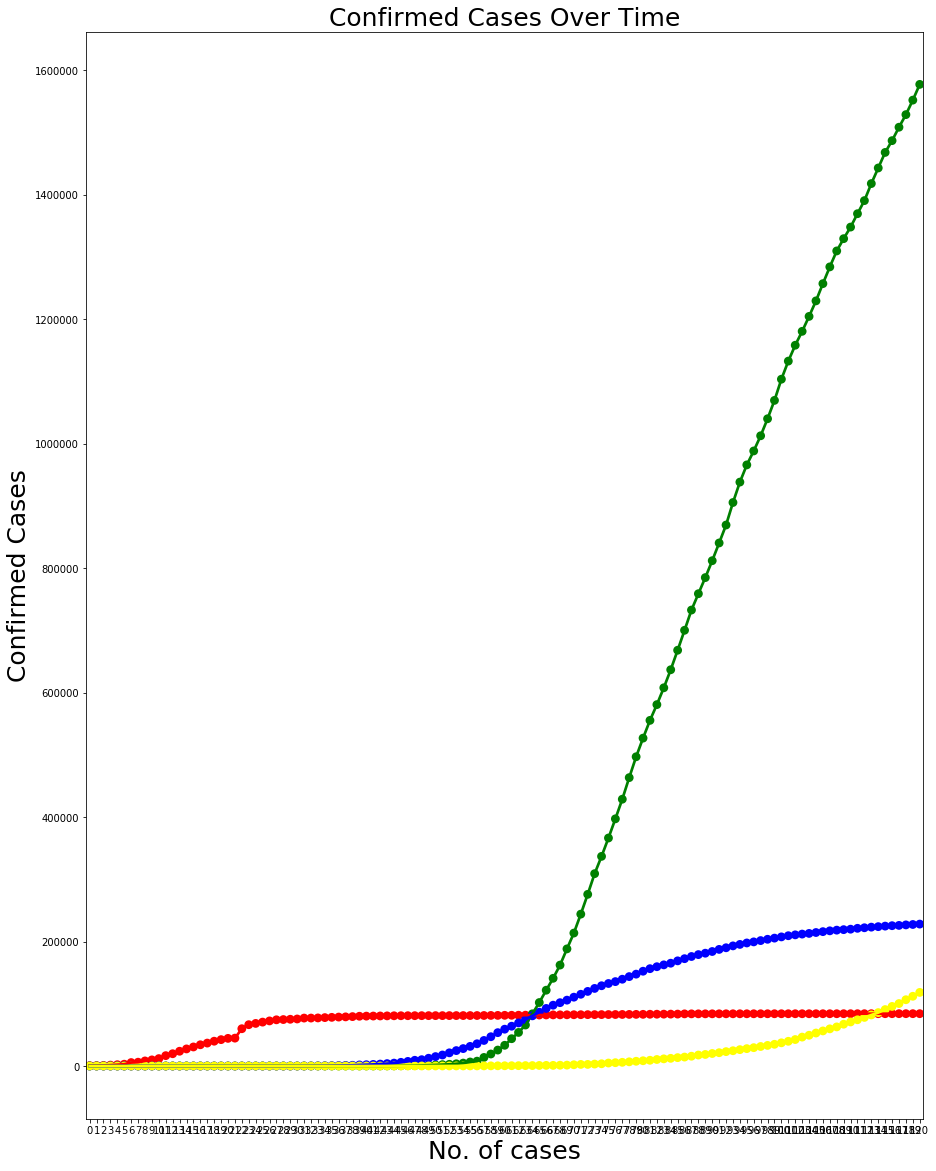

In [127]:
plt.figure(figsize=(15,20))
sns.pointplot(china.index,china.confirmed,color='Red')
sns.pointplot(us.index,us.confirmed,color='Green')
sns.pointplot(italy.index,italy.confirmed,color='Blue')
sns.pointplot(india.index,india.confirmed,color='Yellow')

plt.title('Confirmed Cases Over Time',fontsize=25)
plt.ylabel('Confirmed Cases',fontsize=25)
plt.xlabel('No. of cases',fontsize=25)
plt.show()

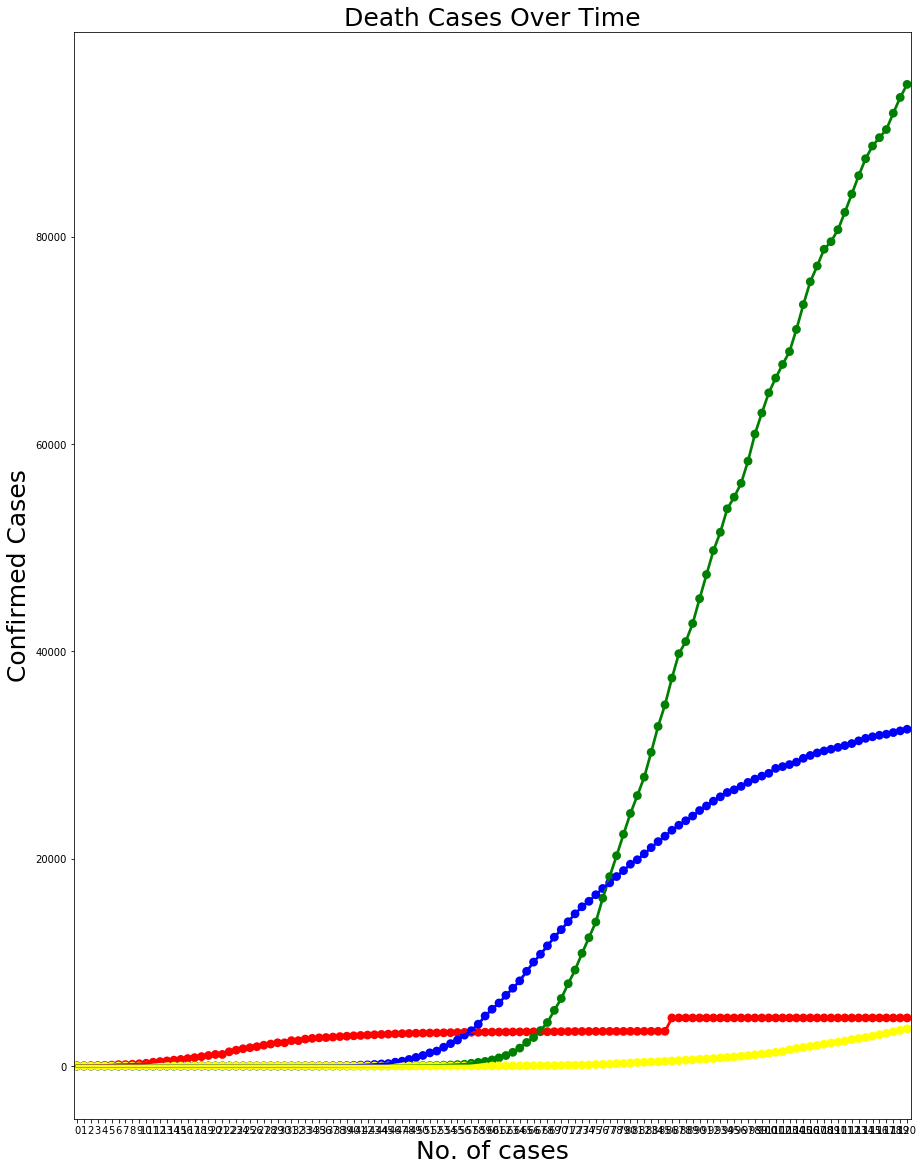

In [133]:
plt.figure(figsize=(15,20))
sns.pointplot(china.index,china.deaths,color='Red')
sns.pointplot(us.index,us.deaths,color='Green')
sns.pointplot(italy.index,italy.deaths,color='Blue')
sns.pointplot(india.index,india.deaths,color='Yellow')

plt.title('Death Cases Over Time',fontsize=25)
plt.ylabel('Confirmed Cases',fontsize=25)
plt.xlabel('No. of cases',fontsize=25)
plt.show()

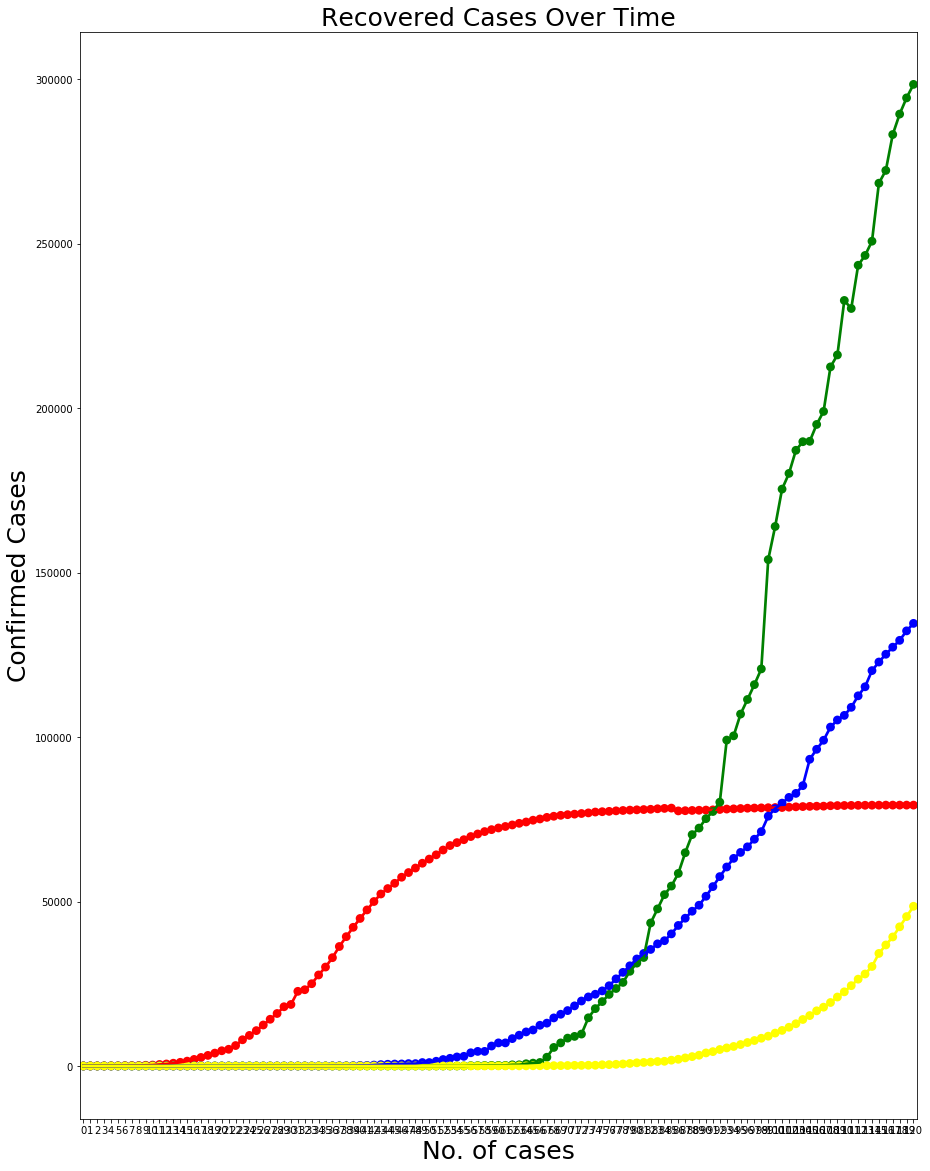

In [134]:
plt.figure(figsize=(15,20))
sns.pointplot(china.index,china.recovered,color='Red')
sns.pointplot(us.index,us.recovered,color='Green')
sns.pointplot(italy.index,italy.recovered,color='Blue')
sns.pointplot(india.index,india.recovered,color='Yellow')

plt.title('Recovered Cases Over Time',fontsize=25)
plt.ylabel('Confirmed Cases',fontsize=25)
plt.xlabel('No. of cases',fontsize=25)
plt.show()